In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# List of directories to create
directories = [
    'img_ana/rmsd',
    'img_ana/tm_rmsd'
]

# Create directories (with parents if needed)
for dir_path in directories:
    os.makedirs(dir_path, exist_ok=True)
    print(f"Created directory: {dir_path}")

Created directory: img_ana/rmsd
Created directory: img_ana/tm_rmsd


In [4]:
def read_xvg(filename):
    data = np.genfromtxt([i for i in open(filename).read().splitlines() 
        if not i.startswith(('#','@'))])
    return data


In [5]:
def single_plot_xvg(inp1, inp2, inp3, inp4, inp5, title_t, sup_tit, out, x_limit, y_limit):
    # Read data from XVG files
    data_rep1 = read_xvg(inp1)
    data_rep2 = read_xvg(inp2)
    data_rep3 = read_xvg(inp3)
    data_rep4 = read_xvg(inp4)
    data_rep5 = read_xvg(inp5)

    fig, ax = plt.subplots(figsize=(10, 6))  # Single plot

    # Set font properties
    font = {'family': 'sans-serif',
            'weight': 'bold',
            'size': 10}
    plt.rc('font', **font)

    # Define axis limits
    # x_limit = (0, 1000)

    # Plot data for each replicate
    ax.plot(data_rep1[:, 0], data_rep1[:, 1], color='red', label=title_t+' rep1')
    ax.plot(data_rep2[:, 0], data_rep2[:, 1], color='blue', label=title_t+' rep2')
    ax.plot(data_rep3[:, 0], data_rep3[:, 1], color='green', label=title_t+' rep3')
    ax.plot(data_rep4[:, 0], data_rep4[:, 1], color='black', label=title_t+' rep4')
    ax.plot(data_rep5[:, 0], data_rep5[:, 1], color='cyan', label=title_t+' rep5')

    # Set axis labels
    ax.set_xlabel('Time (ns)', fontsize=10, fontweight='bold')
    ax.set_ylabel('RMSD (nm)', fontsize=10, fontweight='bold')

    # Set axis limits
    ax.set_xlim(x_limit)
    ax.set_ylim(y_limit)

    # Set title and legend
    ax.set_title(sup_tit, fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)

    # Adjust layout
    plt.tight_layout()

    # Save and show the plot
    plt.savefig(out+".png", bbox_inches='tight')
    # plt.savefig(out+".svg", bbox_inches='tight')
    plt.show()

In [6]:
whole_protein_rmsd = ['sim_ana/rmsd/pro_BB_rmsd_rep1.xvg', 
                   'sim_ana/rmsd/pro_BB_rmsd_rep2.xvg', 
                   'sim_ana/rmsd/pro_BB_rmsd_rep3.xvg', 
                   'sim_ana/rmsd/pro_BB_rmsd_rep4.xvg', 
                   'sim_ana/rmsd/pro_BB_rmsd_rep5.xvg']
whole_protein_rmsd[0]

'sim_ana/rmsd/pro_BB_rmsd_rep1.xvg'

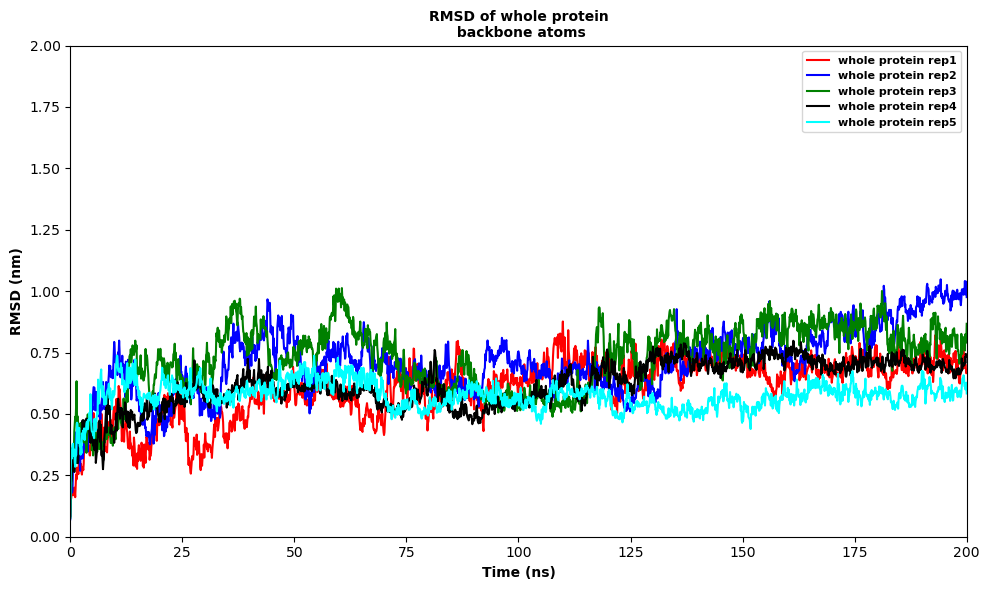

In [7]:
single_plot_xvg(whole_protein_rmsd[0], whole_protein_rmsd[1], whole_protein_rmsd[2], whole_protein_rmsd[3], whole_protein_rmsd[4],  
         "whole protein", "RMSD of whole protein\n backbone atoms", 
         "img_ana/rmsd/all_rep_together_rmsd_whole_protein", (0, 200), (0, 2))

In [8]:
tm_protein_rmsd = ['sim_ana/rmsd/tm_BB_rmsd_rep1.xvg', 
                'sim_ana/rmsd/tm_BB_rmsd_rep2.xvg', 
                'sim_ana/rmsd/tm_BB_rmsd_rep3.xvg',
                'sim_ana/rmsd/tm_BB_rmsd_rep4.xvg',
                'sim_ana/rmsd/tm_BB_rmsd_rep5.xvg']
tm_protein_rmsd[0]


'sim_ana/rmsd/tm_BB_rmsd_rep1.xvg'

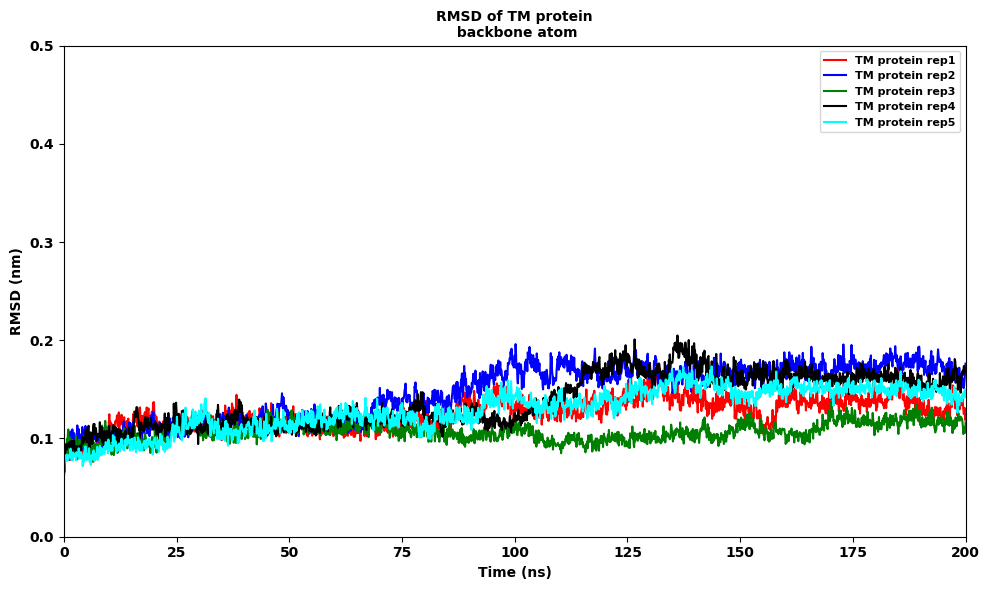

In [9]:
single_plot_xvg(tm_protein_rmsd[0], tm_protein_rmsd[1], tm_protein_rmsd[2], tm_protein_rmsd[3], tm_protein_rmsd[4],  
         "TM protein", "RMSD of TM protein\n backbone atom", 
         "img_ana/rmsd/all_rep_together_rmsd_tm_protein", (0, 200), (0, 0.5))

In [10]:
ligand_rmsd = ['sim_ana/rmsd/ligand_rmsd_rep1.xvg', 
                   'sim_ana/rmsd/ligand_rmsd_rep2.xvg', 
                   'sim_ana/rmsd/ligand_rmsd_rep3.xvg', 
                   'sim_ana/rmsd/ligand_rmsd_rep4.xvg', 
                   'sim_ana/rmsd/ligand_rmsd_rep5.xvg']

ligand_rmsd[1]

'sim_ana/rmsd/ligand_rmsd_rep2.xvg'

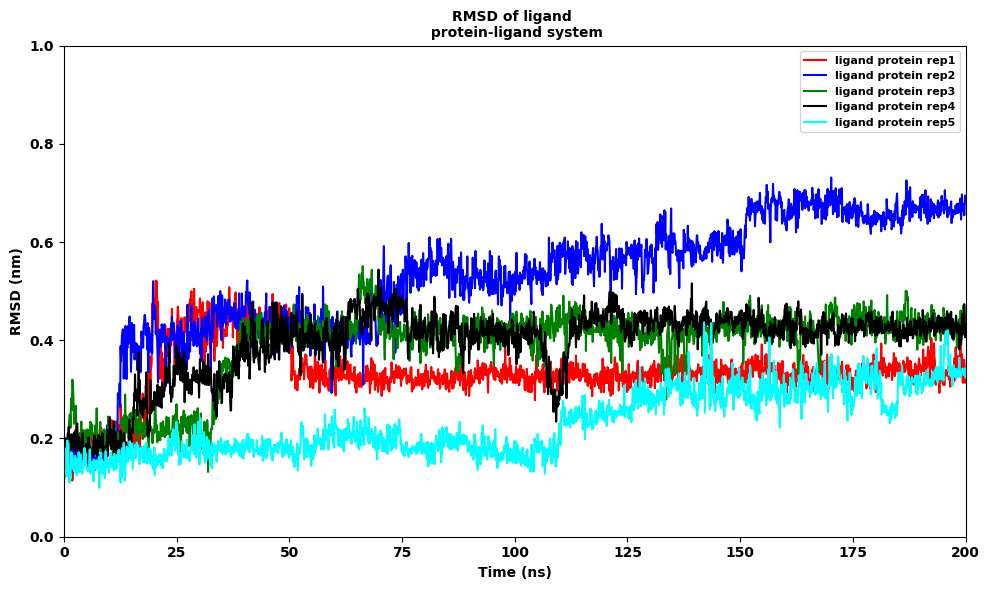

In [11]:
single_plot_xvg(ligand_rmsd[0], ligand_rmsd[1], ligand_rmsd[2], ligand_rmsd[3], ligand_rmsd[4],  
         "ligand protein", "RMSD of ligand \n protein-ligand system", 
          "img_ana/rmsd/all_rep_together_rmsd_ligand", (0, 200), (0, 1))

In [12]:
def plot_xvg(inp1, inp2, inp3, inp4, inp5, title_t, sup_tit, out, x_limit, y_limit):
    # Read data from XVG files
    data_rep1 = read_xvg(inp1)
    data_rep2 = read_xvg(inp2)
    data_rep3 = read_xvg(inp3)
    data_rep4 = read_xvg(inp4)
    data_rep5 = read_xvg(inp5)


    fig, axs = plt.subplots(5, 1, figsize=(10, 15))  # 1 row, 7 columns

    # Set font properties
    font = {'family': 'sans-serif',
            'weight': 'bold',
            'size': 10}
    plt.rc('font', **font)

    # Define axis limits
#     x_limit = (0, 1000)

    # Plot data for each replicate
    axs[0].plot(data_rep1[:, 0], data_rep1[:, 1], color='red')
    axs[0].set_title(title_t+' rep1', fontweight='bold', fontsize=10)
    axs[0].tick_params(axis='both', which='major', labelsize=10)
    axs[0].set_xlim(x_limit)
    axs[0].set_ylim(y_limit)

    axs[1].plot(data_rep2[:, 0], data_rep2[:, 1], color='blue')
    axs[1].set_title(title_t+' rep2', fontweight='bold', fontsize=10)
    axs[1].tick_params(axis='both', which='major', labelsize=10)
    axs[1].set_xlim(x_limit)
    axs[1].set_ylim(y_limit)

    axs[2].plot(data_rep3[:, 0], data_rep3[:, 1], color='green')
    axs[2].set_title(title_t+' rep3', fontweight='bold', fontsize=10)
    axs[2].tick_params(axis='both', which='major', labelsize=10)
    axs[2].set_xlim(x_limit)
    axs[2].set_ylim(y_limit)

    axs[3].plot(data_rep4[:, 0], data_rep4[:, 1], color='black')
    axs[3].set_title(title_t+' rep4', fontweight='bold', fontsize=10)
    axs[3].tick_params(axis='both', which='major', labelsize=10)
    axs[3].set_xlim(x_limit)
    axs[3].set_ylim(y_limit)

    axs[4].plot(data_rep5[:, 0], data_rep5[:, 1], color='cyan')
    axs[4].set_title(title_t+' rep5', fontweight='bold', fontsize=10)
    axs[4].tick_params(axis='both', which='major', labelsize=10)
    axs[4].set_xlim(x_limit)
    axs[4].set_ylim(y_limit)

    # Set common labels
    fig.text(0.5, 0.04, 'Time (ns)', ha='center', fontsize=10, fontweight='bold')
    fig.text(0.04, 0.5, 'RMSD (nm)', va='center', rotation='vertical', fontsize=10, fontweight='bold')

    # Set suptitle
    fig.suptitle(sup_tit, fontsize=10, fontweight='bold')

    # Adjust layout
    plt.tight_layout(rect=[0.04, 0.04, 1, 0.96])

    # Save and show the plot
    plt.savefig(out+".png", bbox_inches='tight')
    # plt.savefig(out+".svg", bbox_inches='tight')
    plt.show()

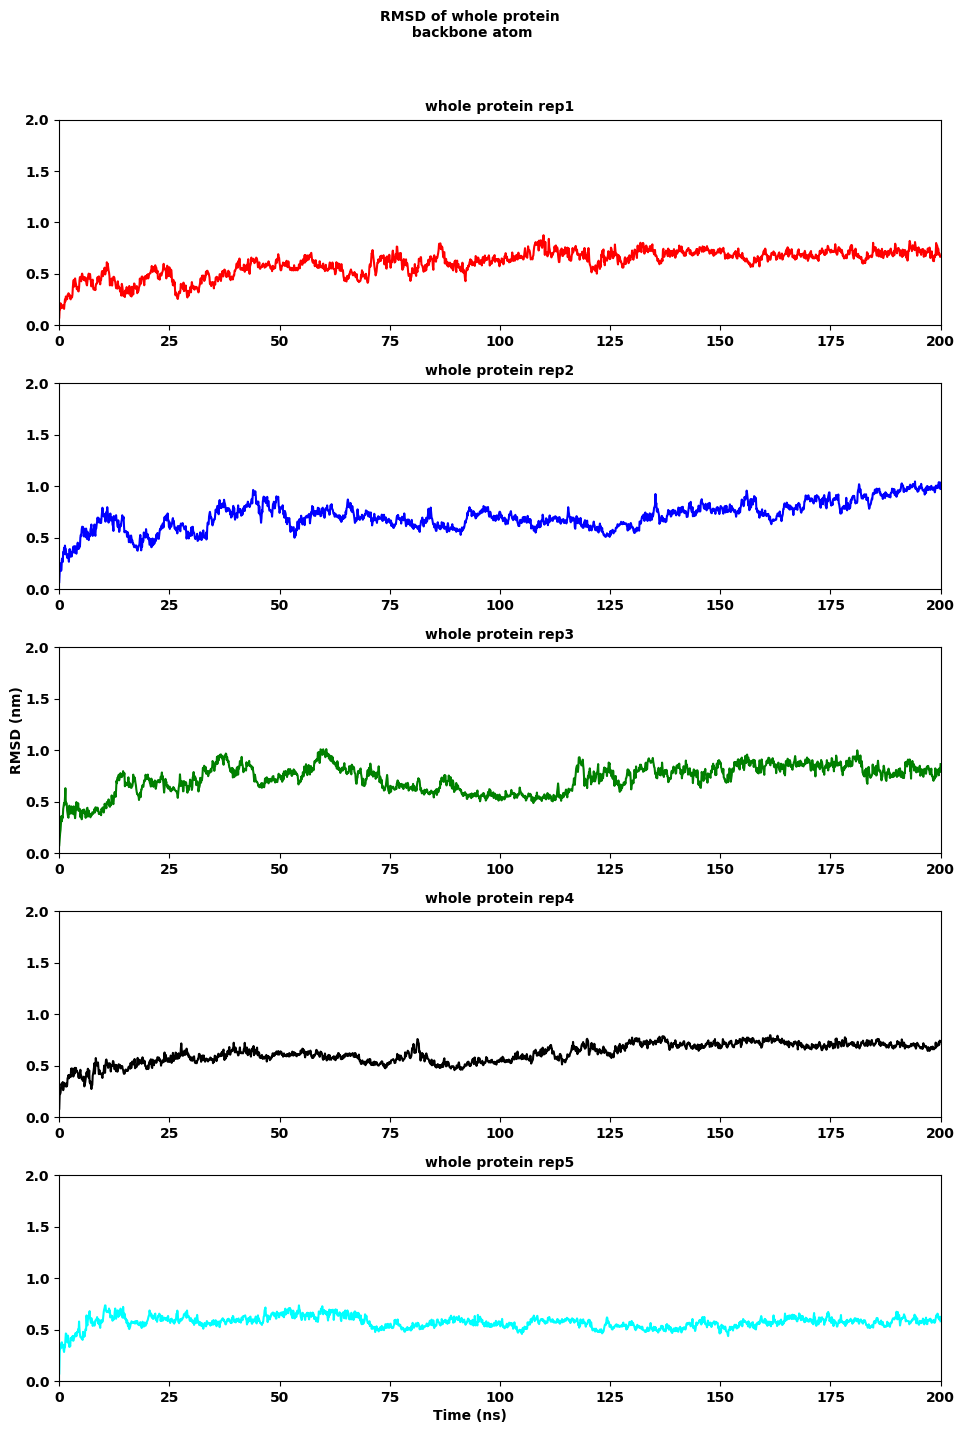

In [13]:
plot_xvg(whole_protein_rmsd[0], whole_protein_rmsd[1], whole_protein_rmsd[2], whole_protein_rmsd[3], whole_protein_rmsd[4],  
         "whole protein", "RMSD of whole protein\n backbone atom", 
          "img_ana/rmsd/indv_rep_together_rmsd_whole_protein", (0, 200), (0, 2))

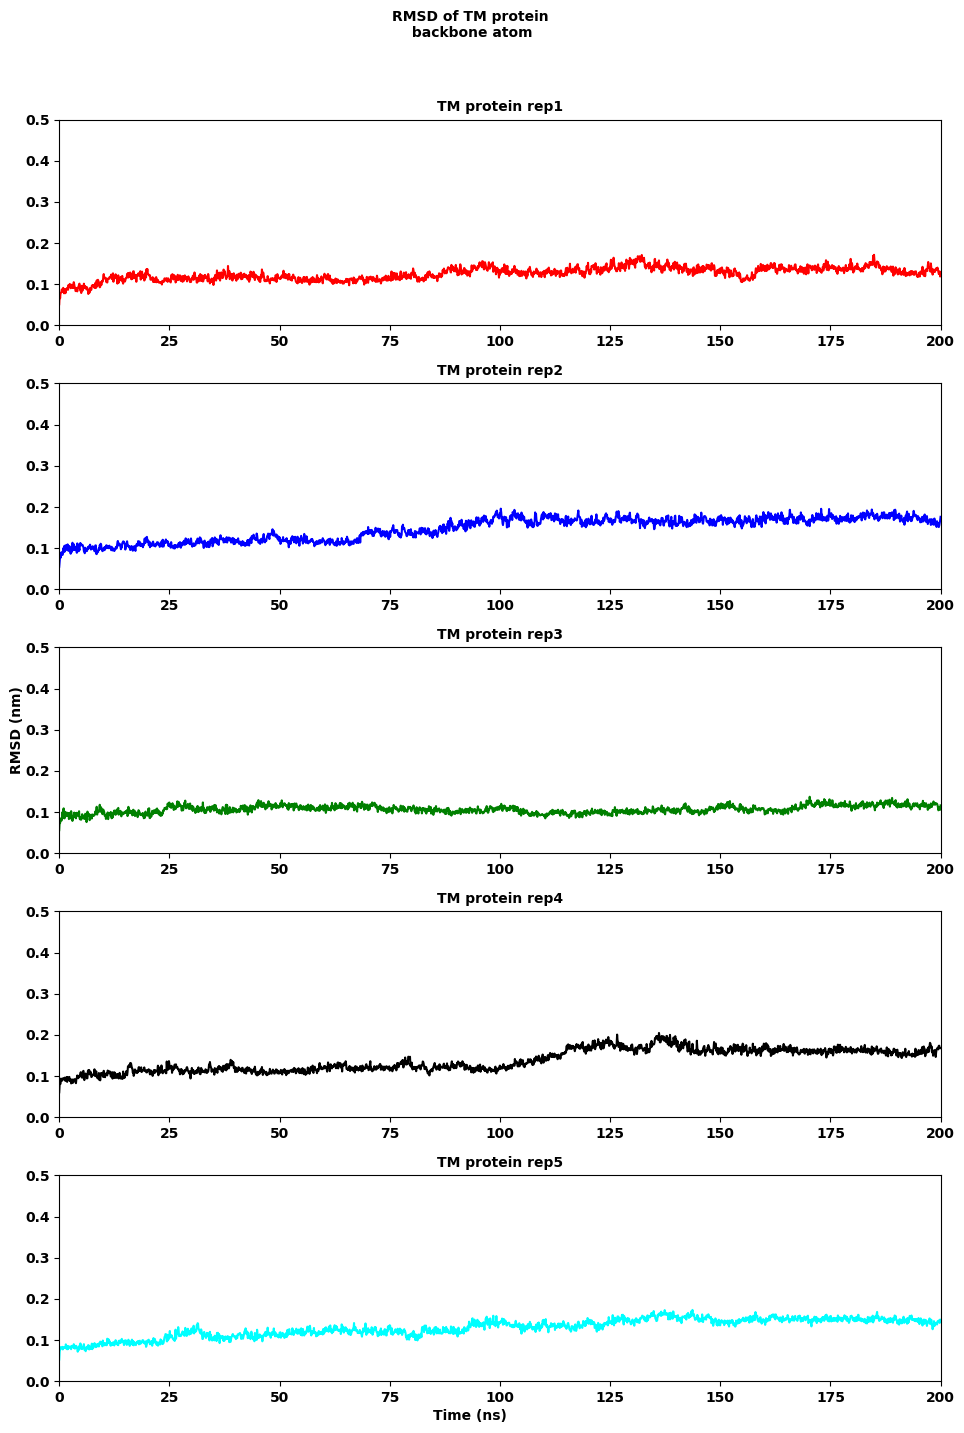

In [14]:
plot_xvg(tm_protein_rmsd[0], tm_protein_rmsd[1], tm_protein_rmsd[2], tm_protein_rmsd[3], tm_protein_rmsd[4],  
         "TM protein", "RMSD of TM protein\n backbone atom", 
          "img_ana/rmsd/indv_rep_together_rmsd_tm", (0, 200), (0, 0.5))

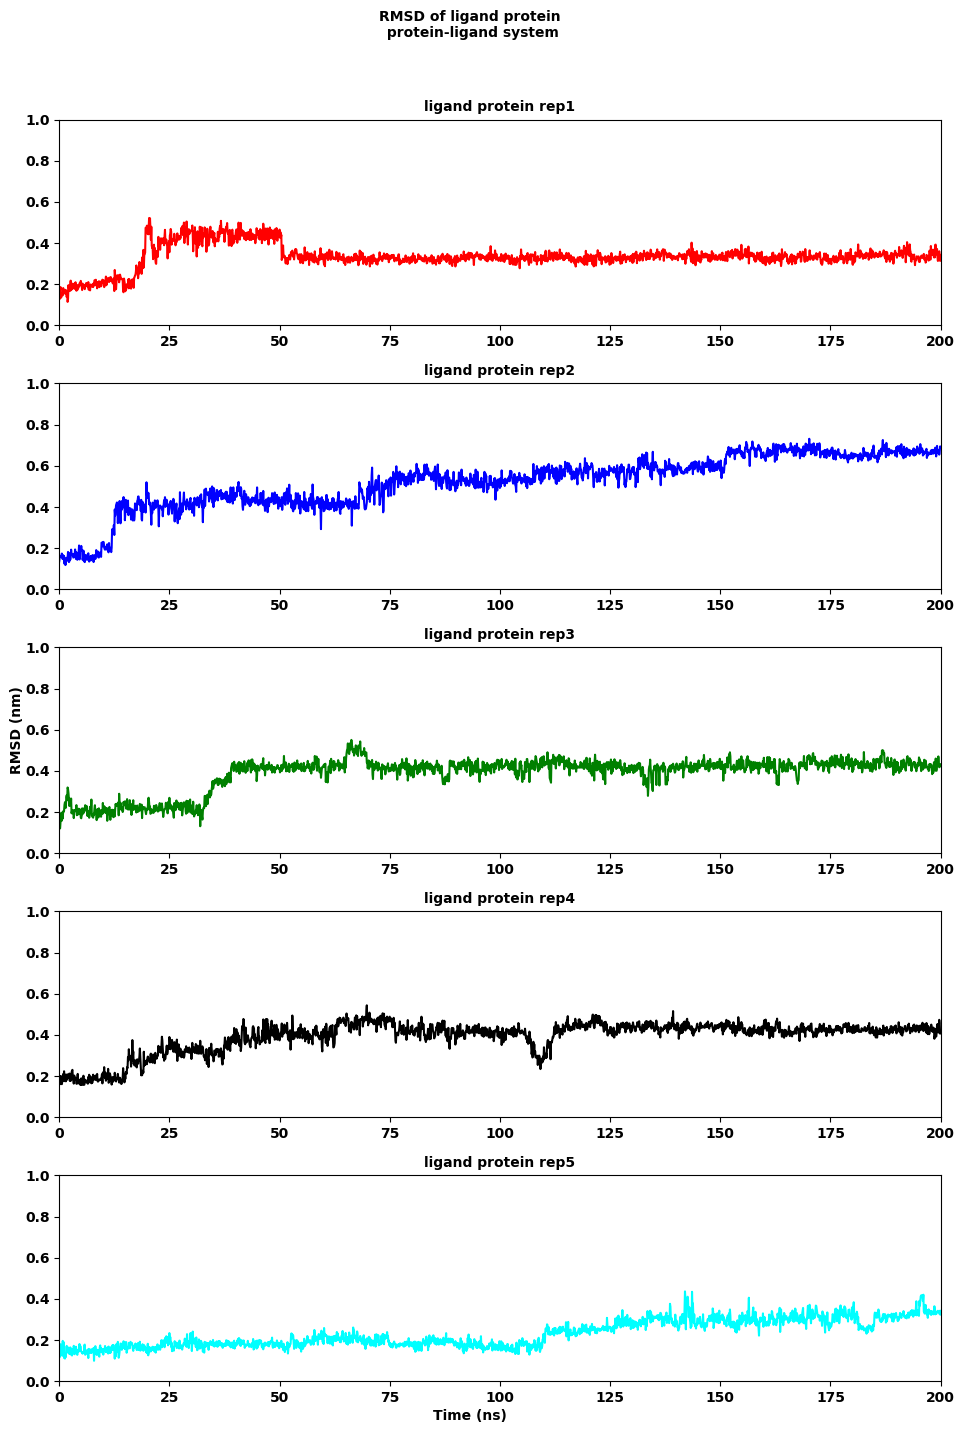

In [15]:
plot_xvg(ligand_rmsd[0], ligand_rmsd[1], ligand_rmsd[2], ligand_rmsd[3], ligand_rmsd[4],  
         "ligand protein", "RMSD of ligand protein\n protein-ligand system", 
          "img_ana/rmsd/indv_rep_together_rmsd_ligand", (0, 200), (0, 1))

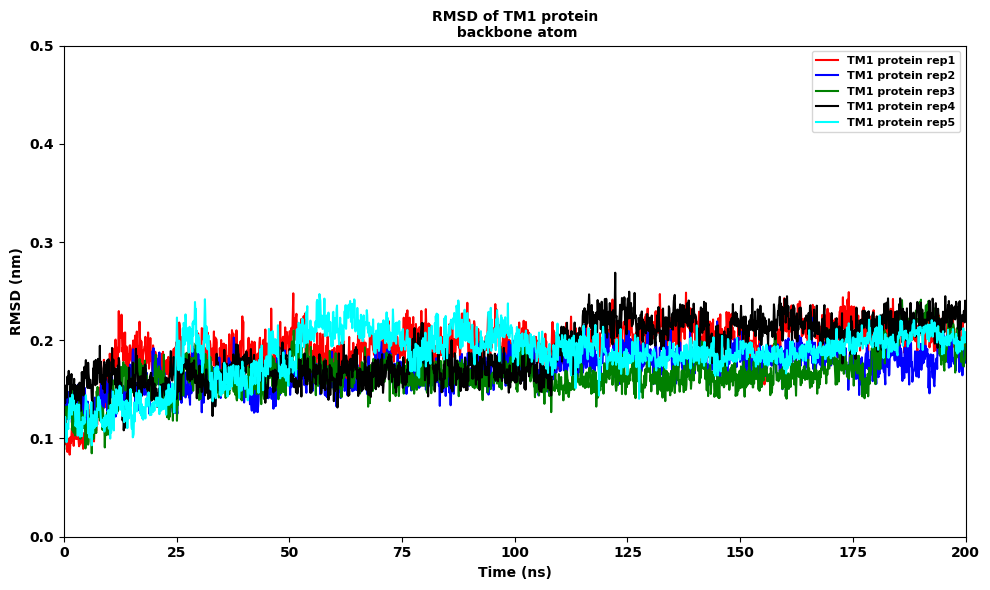

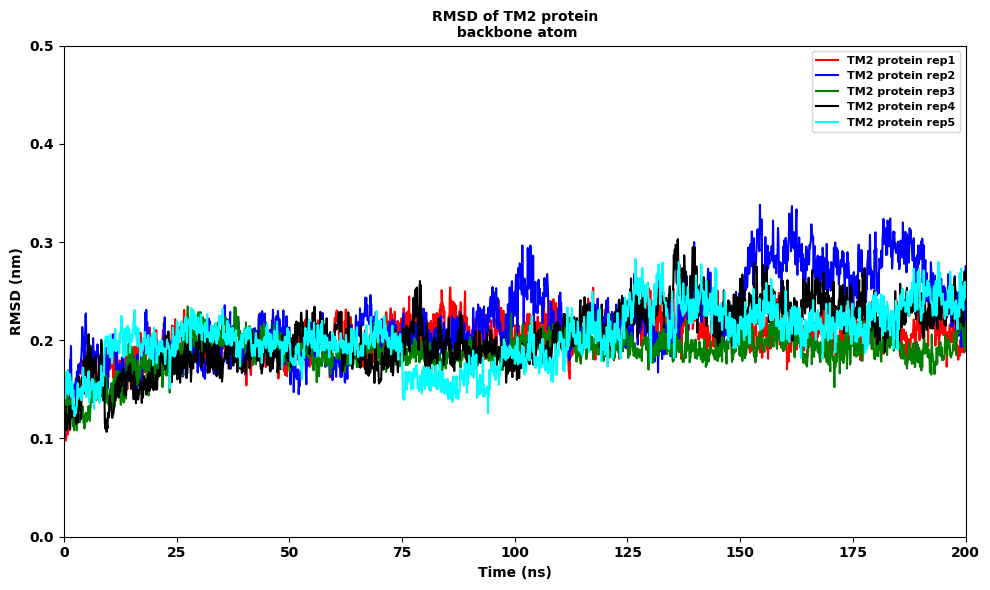

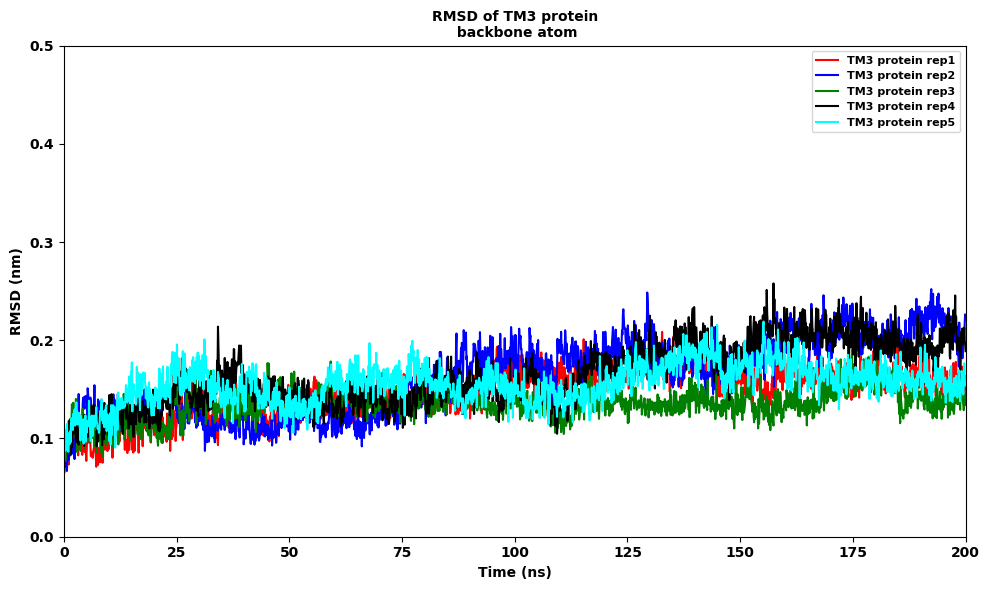

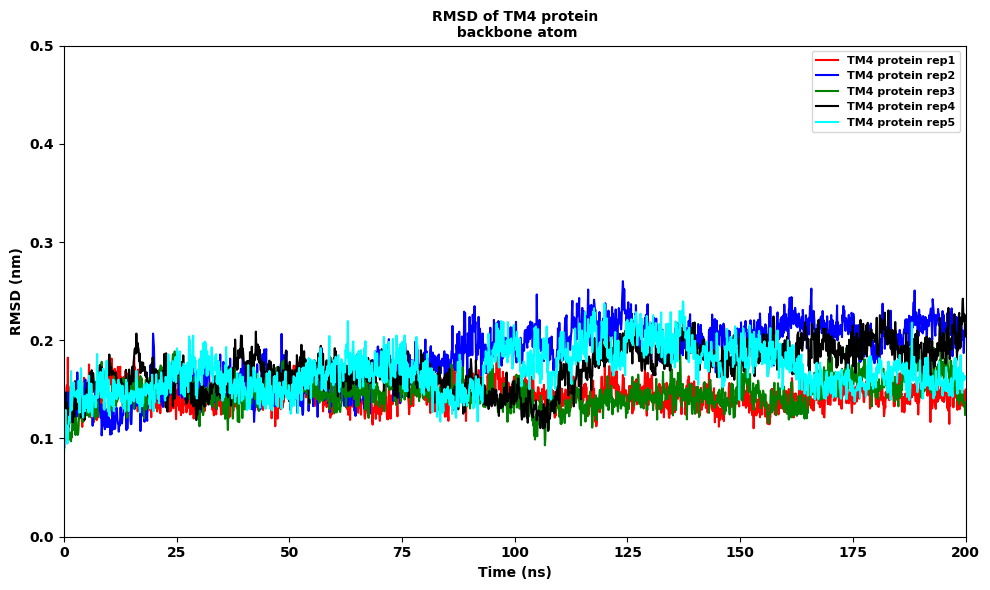

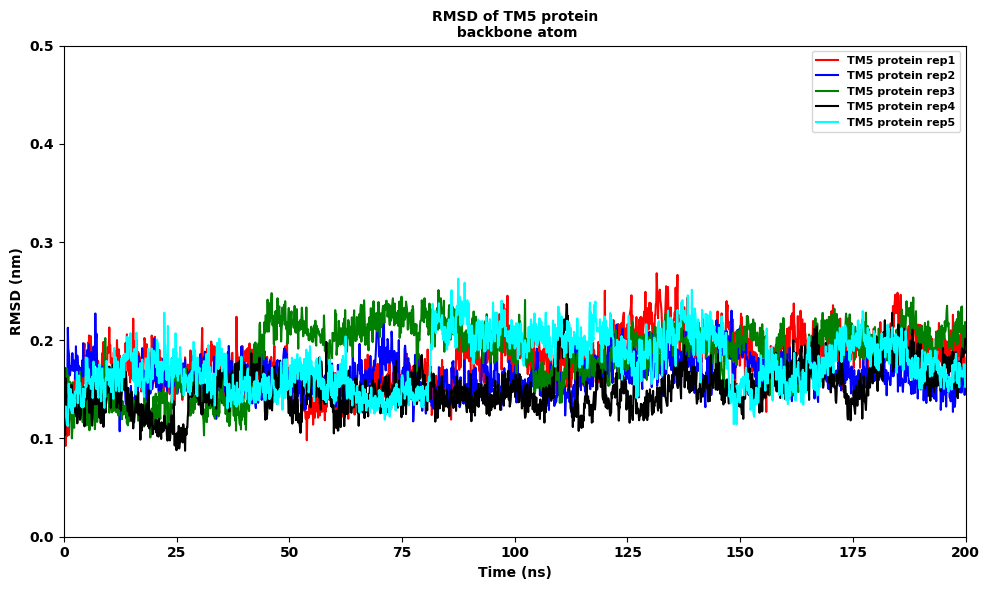

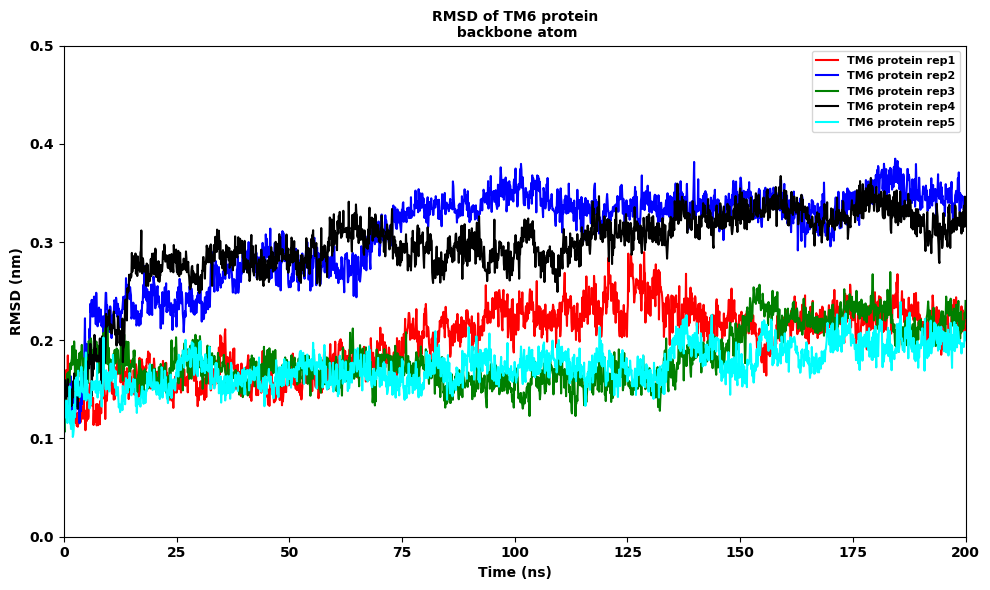

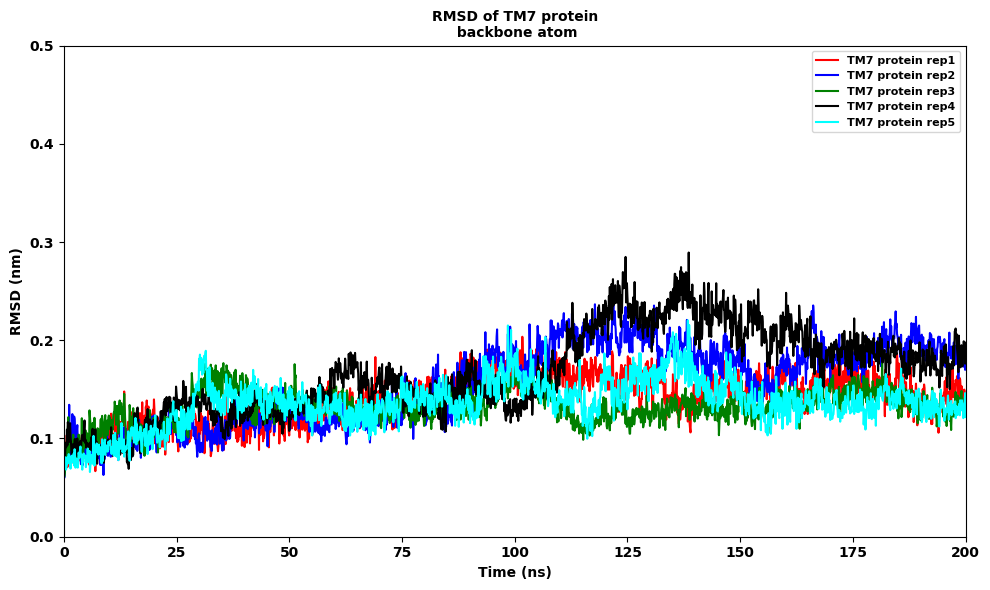

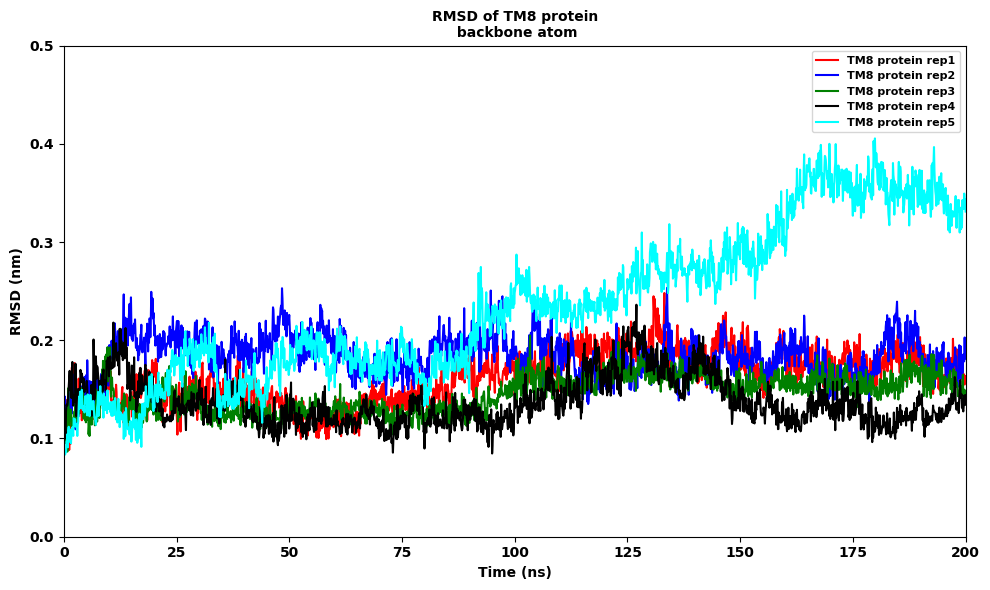

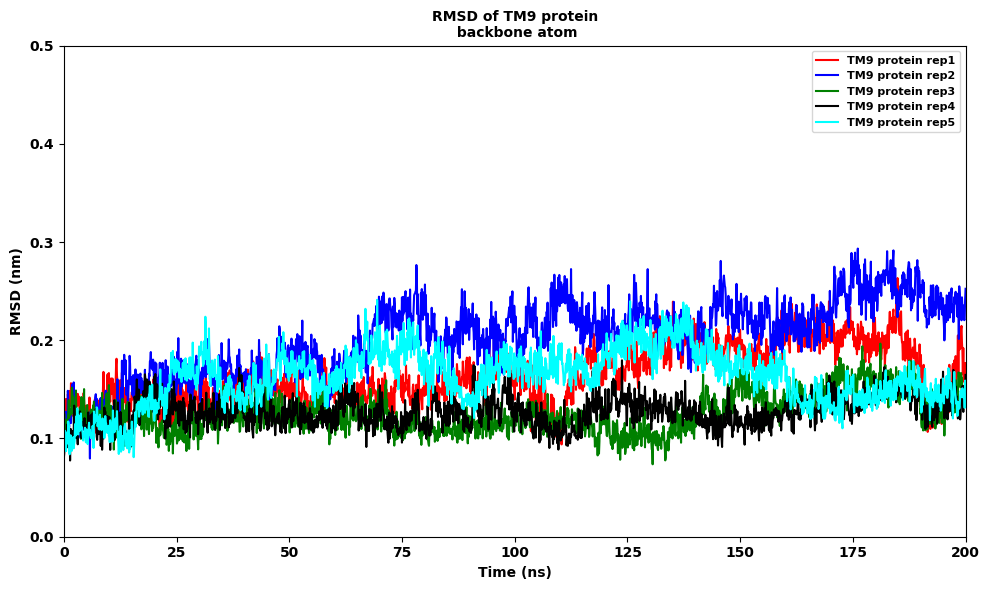

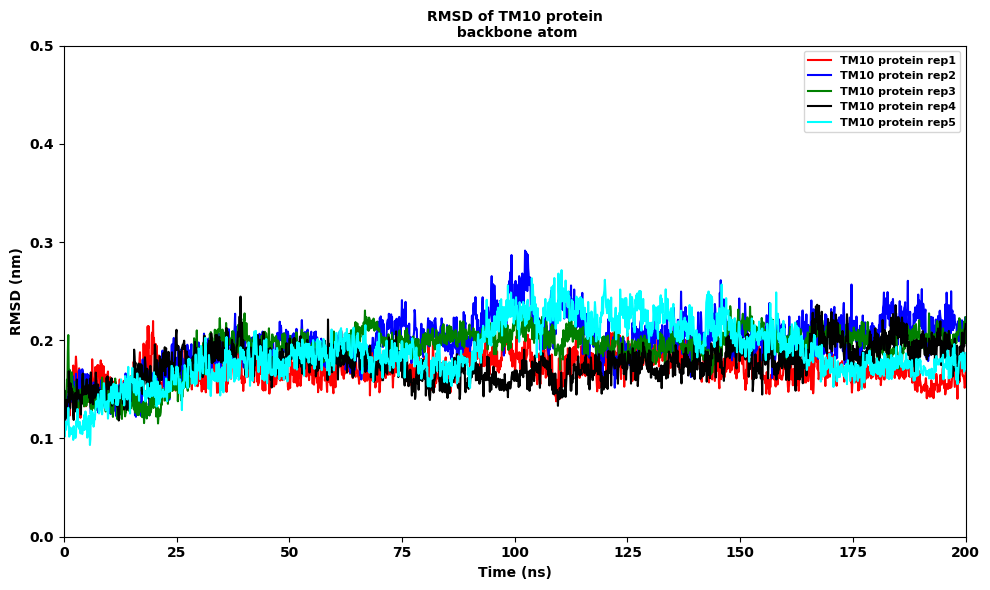

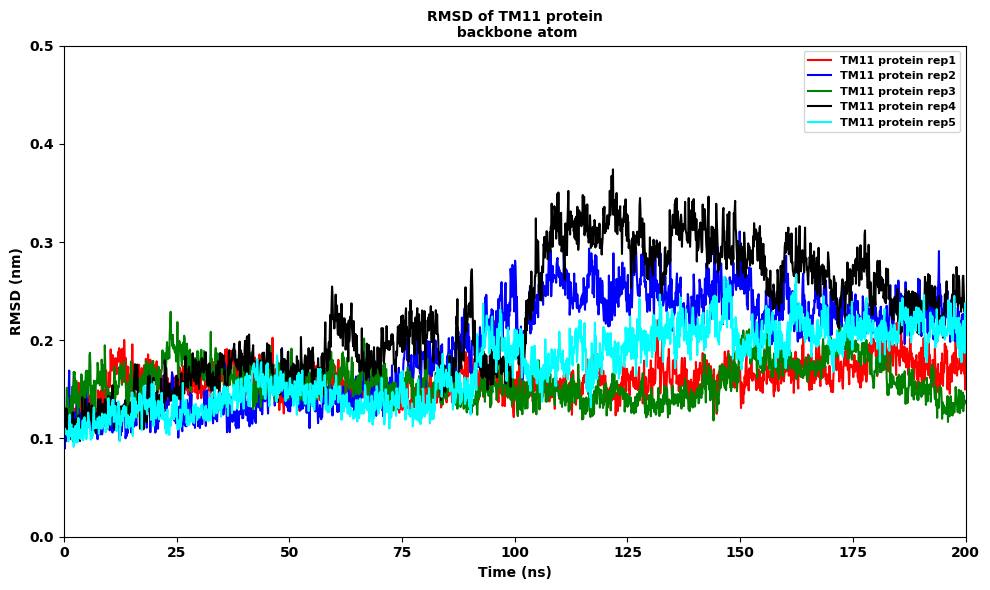

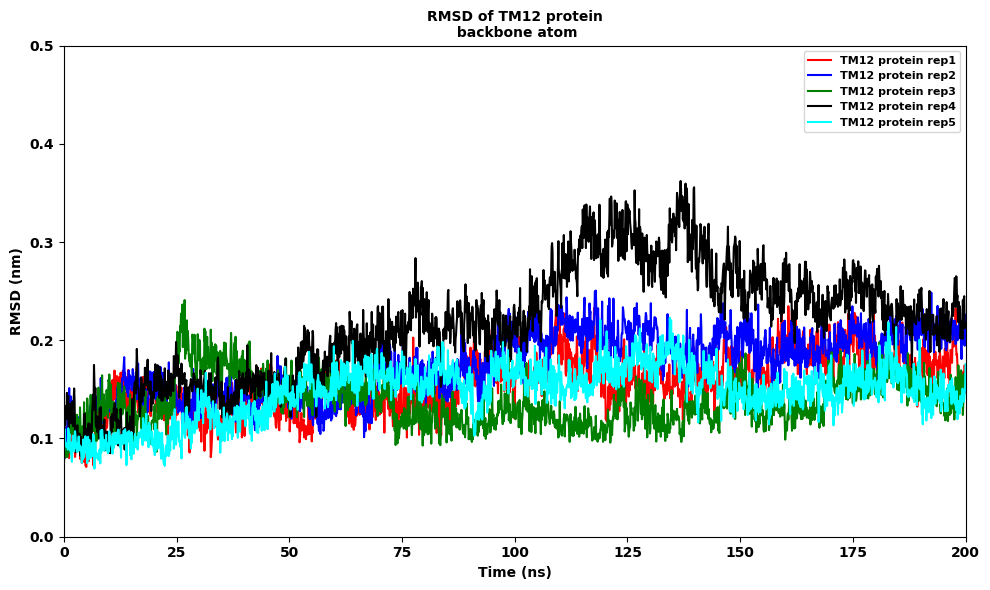

In [16]:
# Generate plots for all TM segments (TM1 to TM12)
for tm_num in range(1, 13):
    tm_name = f"TM{tm_num}"
    
    # Generate file paths for current TM segment
    tm_files = [
        f'sim_ana/tm_rmsd/{tm_name}_rmsd_rep1.xvg',
        f'sim_ana/tm_rmsd/{tm_name}_rmsd_rep2.xvg',
        f'sim_ana/tm_rmsd/{tm_name}_rmsd_rep3.xvg',
        f'sim_ana/tm_rmsd/{tm_name}_rmsd_rep4.xvg',
        f'sim_ana/tm_rmsd/{tm_name}_rmsd_rep5.xvg'
    ]
    
    # # Generate individual replicate plots
    # plot_xvg(tm_files[0], tm_files[1], tm_files[2], tm_files[3], tm_files[4],  
    #          f"{tm_name} protein", f"RMSD of {tm_name} protein\n backbone atom", 
    #          f"img_ana/tm_rmsd/indv_rep_together_rmsd_{tm_name.lower()}", (0, 200), (0, 0.5))
    
    # Generate combined plot
    single_plot_xvg(tm_files[0], tm_files[1], tm_files[2], tm_files[3], tm_files[4],  
                   f"{tm_name} protein", f"RMSD of {tm_name} protein\n backbone atom", 
                   f"img_ana/tm_rmsd/all_rep_together_rmsd_{tm_name.lower()}", (0, 200), (0, 0.5))